<a href="https://colab.research.google.com/github/jennyweng90/deep-learning/blob/main/SimpleRNN_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 1
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value)

# Simple RNN example

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [ ]:
# Make sample data and label data
sample = np.array([[[0],[1]],
          [[1],[1]],
          [[1],[2]]]
          )
label = np.array([1, 2, 0])

print(sample)

sample = to_categorical(sample)
print(sample)

label = to_categorical(label)
print(label)

[[[0]
  [1]]

 [[1]
  [1]]

 [[1]
  [2]]]
[[[1. 0. 0.]
  [0. 1. 0.]]

 [[0. 1. 0.]
  [0. 1. 0.]]

 [[0. 1. 0.]
  [0. 0. 1.]]]
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
# Build Model
model = Sequential()
model.add(layers.SimpleRNN(3,
            input_shape=(2, 3),
            activation='softmax'))
model.summary()

# Compile Model
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['acc'])
# Fit model
history = model.fit(sample,
          label,
          epochs=350
          )
# Predict Dinner
predict = model.predict(sample)
print(predict)
predict = np.argmax(predict,axis=1)
predict

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/350
1/1 [==============================] - 2s 2s/step - loss: 1.1956 - acc: 0.3333
Epoch 2/350
1/1 [==============================] - 0s 16ms/step - loss: 1.1938 - acc: 0.3333
Epoch 3/350
1/1 [==============================] - 0s 19ms/step - loss: 1.1920 - acc: 0.3333
Epoch 4/350
1/1 [==============================] - 0s 18ms/step - loss: 1.1903 - acc: 0.3333
Epoch 5/350
1/1 [==============================] - 0s 18ms/step - loss: 1.1885 - acc: 0.3333
Epoch 6/350
1/1 [==============================] - 0s 17ms/step - loss: 1.1867 - acc: 0.3333
Epoch 7/350
1/1 [=============

array([1, 1, 0])

In [ ]:
# Build Model
model = Sequential()
model.add(layers.SimpleRNN(10,
            input_shape=(2, 3),
            activation='softmax'))
model.summary()

# Compile Model
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['acc'])
# Fit model
history = model.fit(sample,
          label,
          epochs=350
          )
# Predict Dinner
predict = model.predict(sample)
print(predict)
predict = np.argmax(predict,axis=1)
predict

NameError: ignored

In [ ]:
# RNN+DNN Model
model = Sequential()
model.add(layers.SimpleRNN(10,
                           input_shape=(2, 3)))
model.add(layers.Dense(3, activation='softmax'))
model.summary()
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(sample,
                    label,
                    epochs=100
                    )


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 10)                140       
                                                                 
 dense (Dense)               (None, 3)                 33        
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.2440 - acc: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 1.2358 - acc: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 1.2277 - acc: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 1.2197 - acc: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 1.2118 - a

In [ ]:
predict = model.predict(sample)
print(predict)
predict = np.argmax(predict,axis=1)
predict


1/1 [==============================] - 0s 169ms/step
[[0.2038521  0.4694963  0.3266516 ]
 [0.2495084  0.2798844  0.47060725]
 [0.62560517 0.17399427 0.20040059]]


array([1, 2, 0])

In [ ]:
tf.keras.backend.clear_session()

# Realstic Data - BTC

In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/JPY=X.csv')

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-31,110.875000,111.191002,110.496002,110.838997,110.838997,0
1,2017-06-01,110.768997,111.445999,110.768997,110.795998,110.795998,0
2,2017-06-02,111.459999,111.698997,110.342003,111.436996,111.436996,0
3,2017-06-05,110.484001,110.720001,110.345001,110.462997,110.462997,0
4,2017-06-06,110.379997,110.436996,109.241997,110.380997,110.380997,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


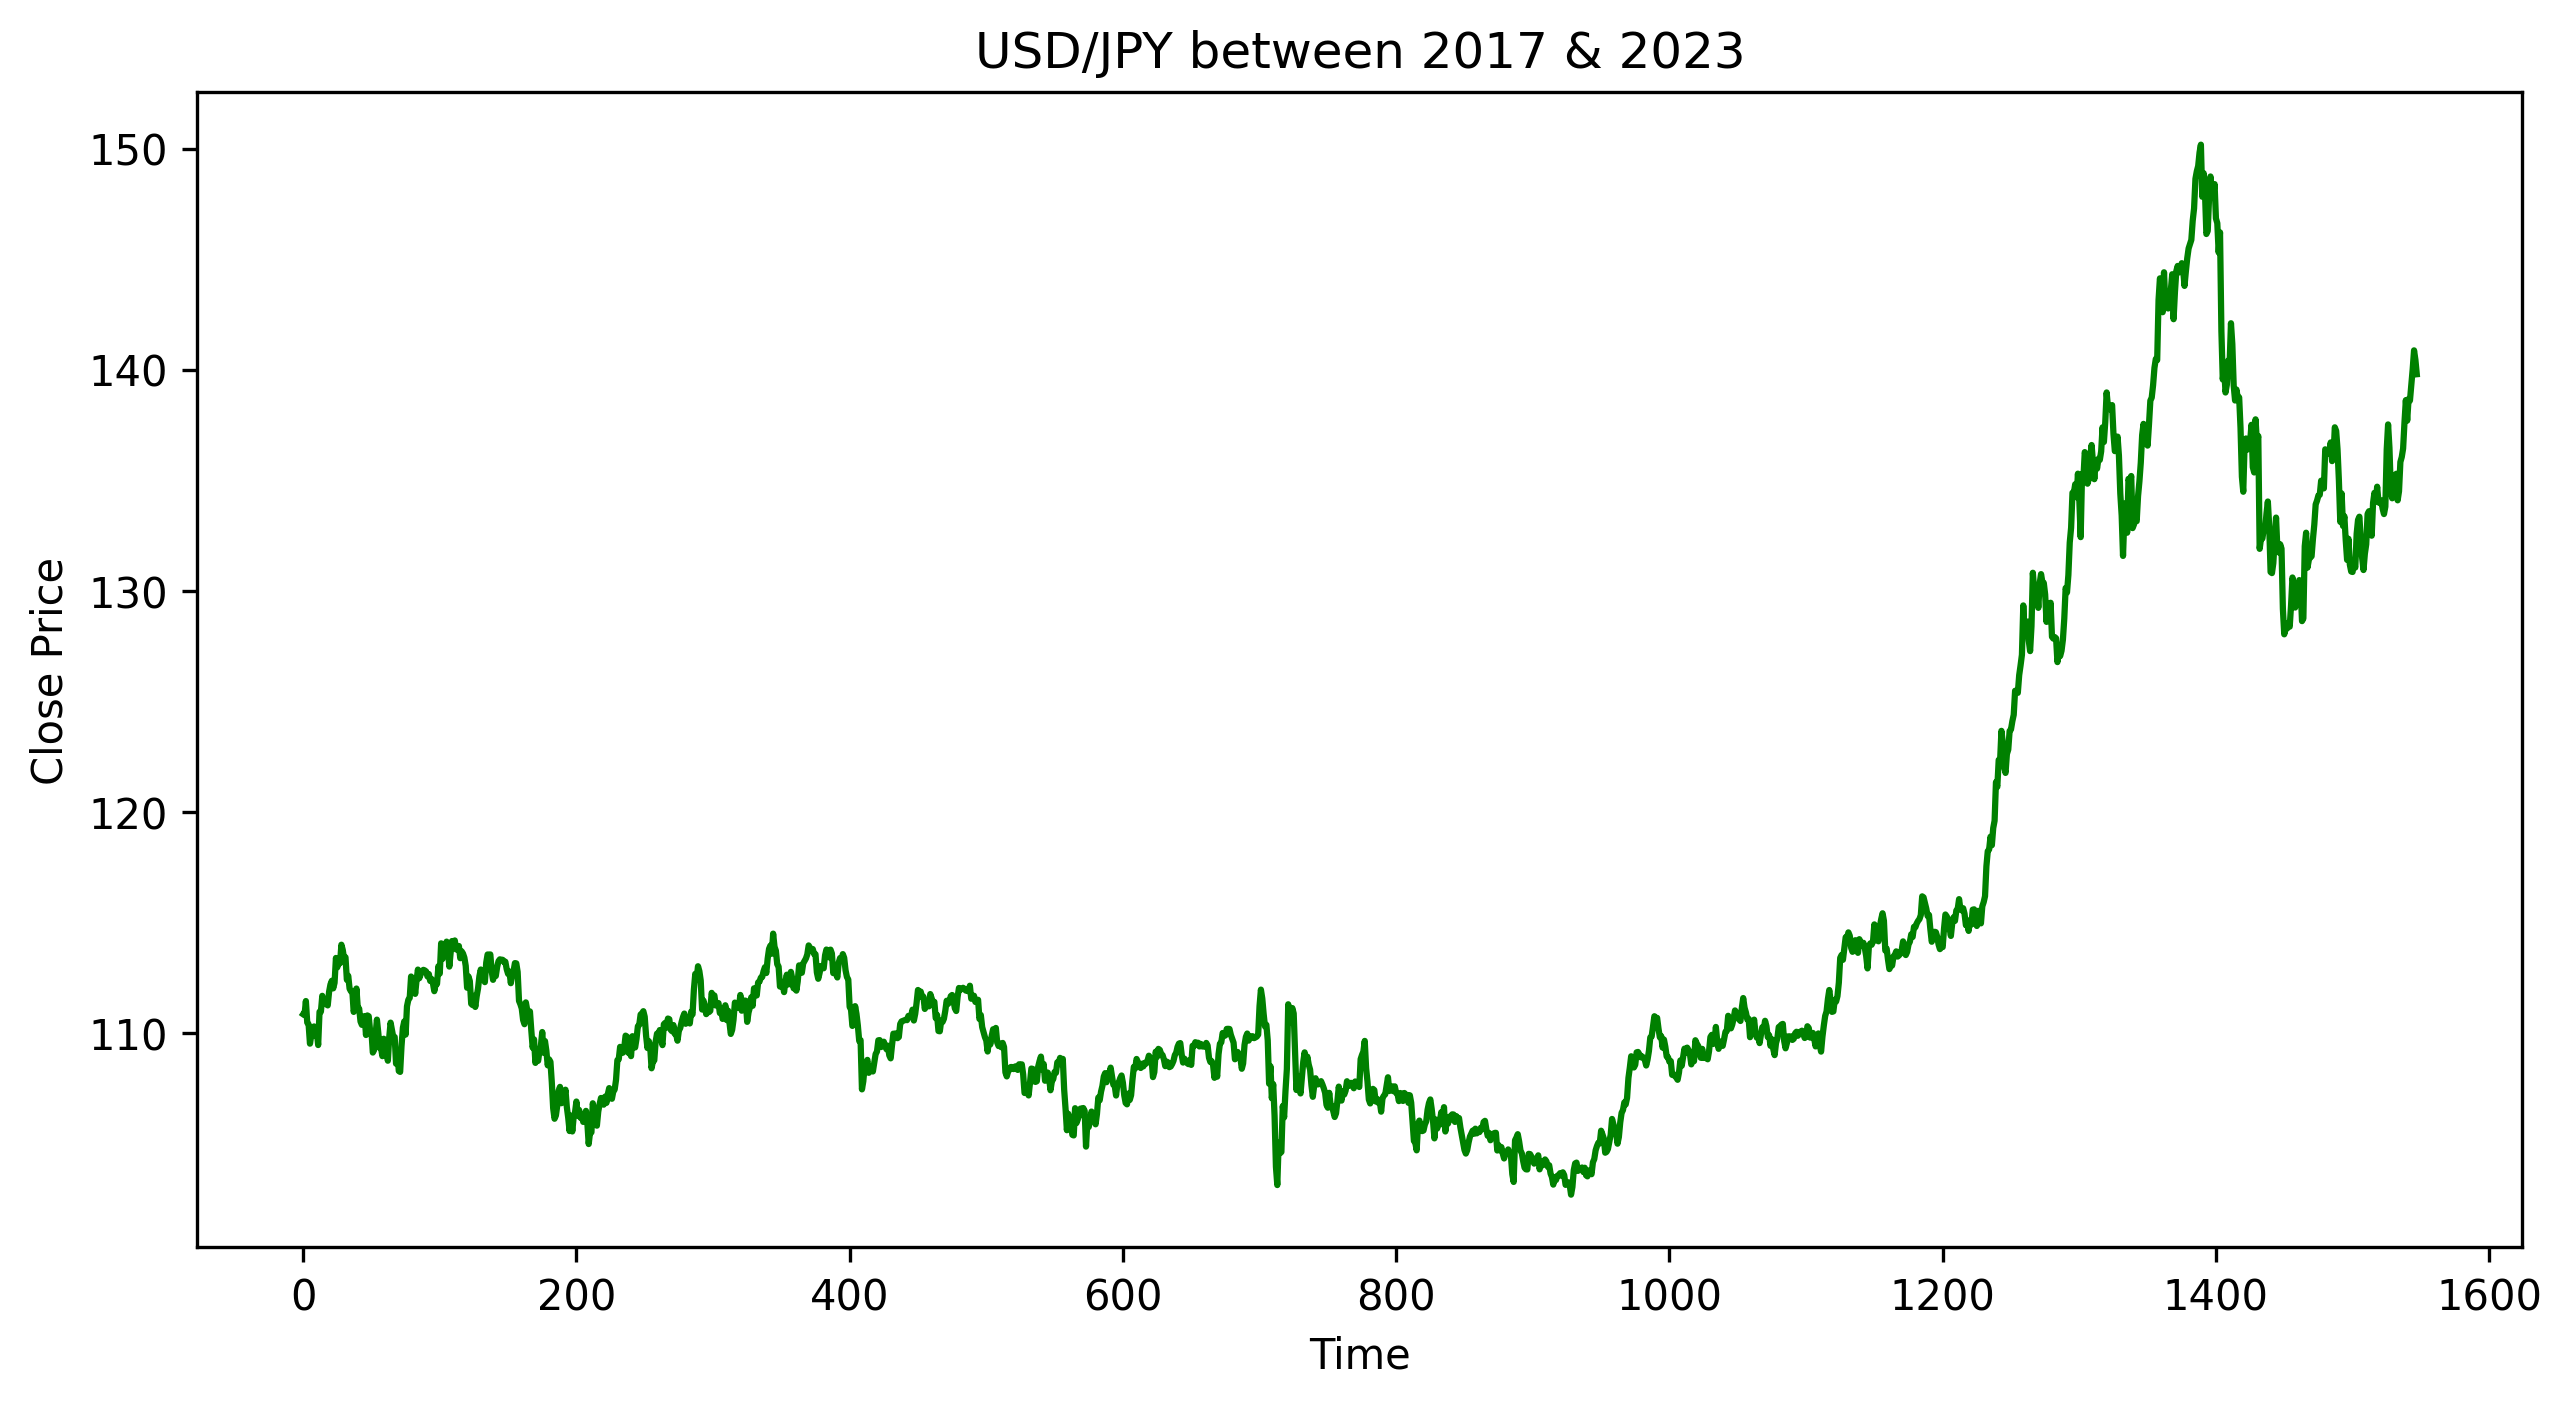

In [ ]:
data=data['Close']
plt.figure(figsize=(10,5),dpi=300)
plt.plot(data, color ='green');
plt.ylabel('Close Price')
plt.title('USD/JPY between 2017 & 2023')
plt.xlabel('Time')
plt.show()

In [ ]:

split =int(0.8*data.shape[0])
Train,Test  = data[0:split] , data[split:]

val_split=int(0.8*Train.shape[0])
Train,Val=Train[0:val_split] , Train[val_split:]
Val=Val.reset_index(drop=True)
Test=Test.reset_index(drop=True)

In [ ]:
#sc = MinMaxScaler(feature_range = (0, 1))
#需將資料做reshape的動作，使其shape為(資料長度,1)

#training_set_scaled = sc.fit_transform(train_set)

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
#需將資料做reshape的動作，使其shape為(資料長度,1)
train_set= Train.values.reshape(-1,1)
training_set_scaled = sc.fit_transform(train_set)
val_set= Val.values.reshape(-1,1)
val_set_scaled = sc.transform(val_set)
test_set = Test.values.reshape(-1,1)
test_set_scaled = sc.transform(test_set)

X_train = []
y_train = []
for i in range(5,len(train_set)):
    X_train.append(training_set_scaled[i-5:i])
    y_train.append(training_set_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_val = []
y_val = []
for i in range(5,len(val_set)):
    X_val.append(val_set_scaled[i-5:i])
    y_val.append(val_set_scaled[i])
X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val,(X_val.shape[0], X_val.shape[1], 1))

X_test = []
y_test = []
for i in range(5,len(test_set)):
    X_test.append(test_set_scaled[i-5:i])
    y_test.append(test_set_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_train[0]

array([[0.69114132],
       [0.6874998 ],
       [0.74178487],
       [0.6592985 ],
       [0.65235405]])

# Fit & compile the model

In [ ]:
keras.backend.clear_session()
model = keras.models.Sequential([
    GRU(32, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
opt=Adam(learning_rate=0.0005,beta_1=0.9)
model.compile(optimizer=opt, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                3360      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 300, batch_size = 96,validation_data=(X_val,y_val))

Epoch 1/300
11/11 [==============================] - 6s 68ms/step - loss: 0.2593 - val_loss: 0.4127
Epoch 2/300
11/11 [==============================] - 0s 10ms/step - loss: 0.1501 - val_loss: 0.2408
Epoch 3/300
11/11 [==============================] - 0s 11ms/step - loss: 0.0746 - val_loss: 0.1232
Epoch 4/300
11/11 [==============================] - 0s 11ms/step - loss: 0.0319 - val_loss: 0.0543
Epoch 5/300
11/11 [==============================] - 0s 9ms/step - loss: 0.0147 - val_loss: 0.0242
Epoch 6/300
11/11 [==============================] - 0s 13ms/step - loss: 0.0117 - val_loss: 0.0153
Epoch 7/300
11/11 [==============================] - 0s 11ms/step - loss: 0.0114 - val_loss: 0.0147
Epoch 8/300
11/11 [==============================] - 0s 12ms/step - loss: 0.0106 - val_loss: 0.0164
Epoch 9/300
11/11 [==============================] - 0s 10ms/step - loss: 0.0099 - val_loss: 0.0172
Epoch 10/300
11/11 [==============================] - 0s 11ms/step - loss: 0.0094 - val_loss: 0.0160


In [ ]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

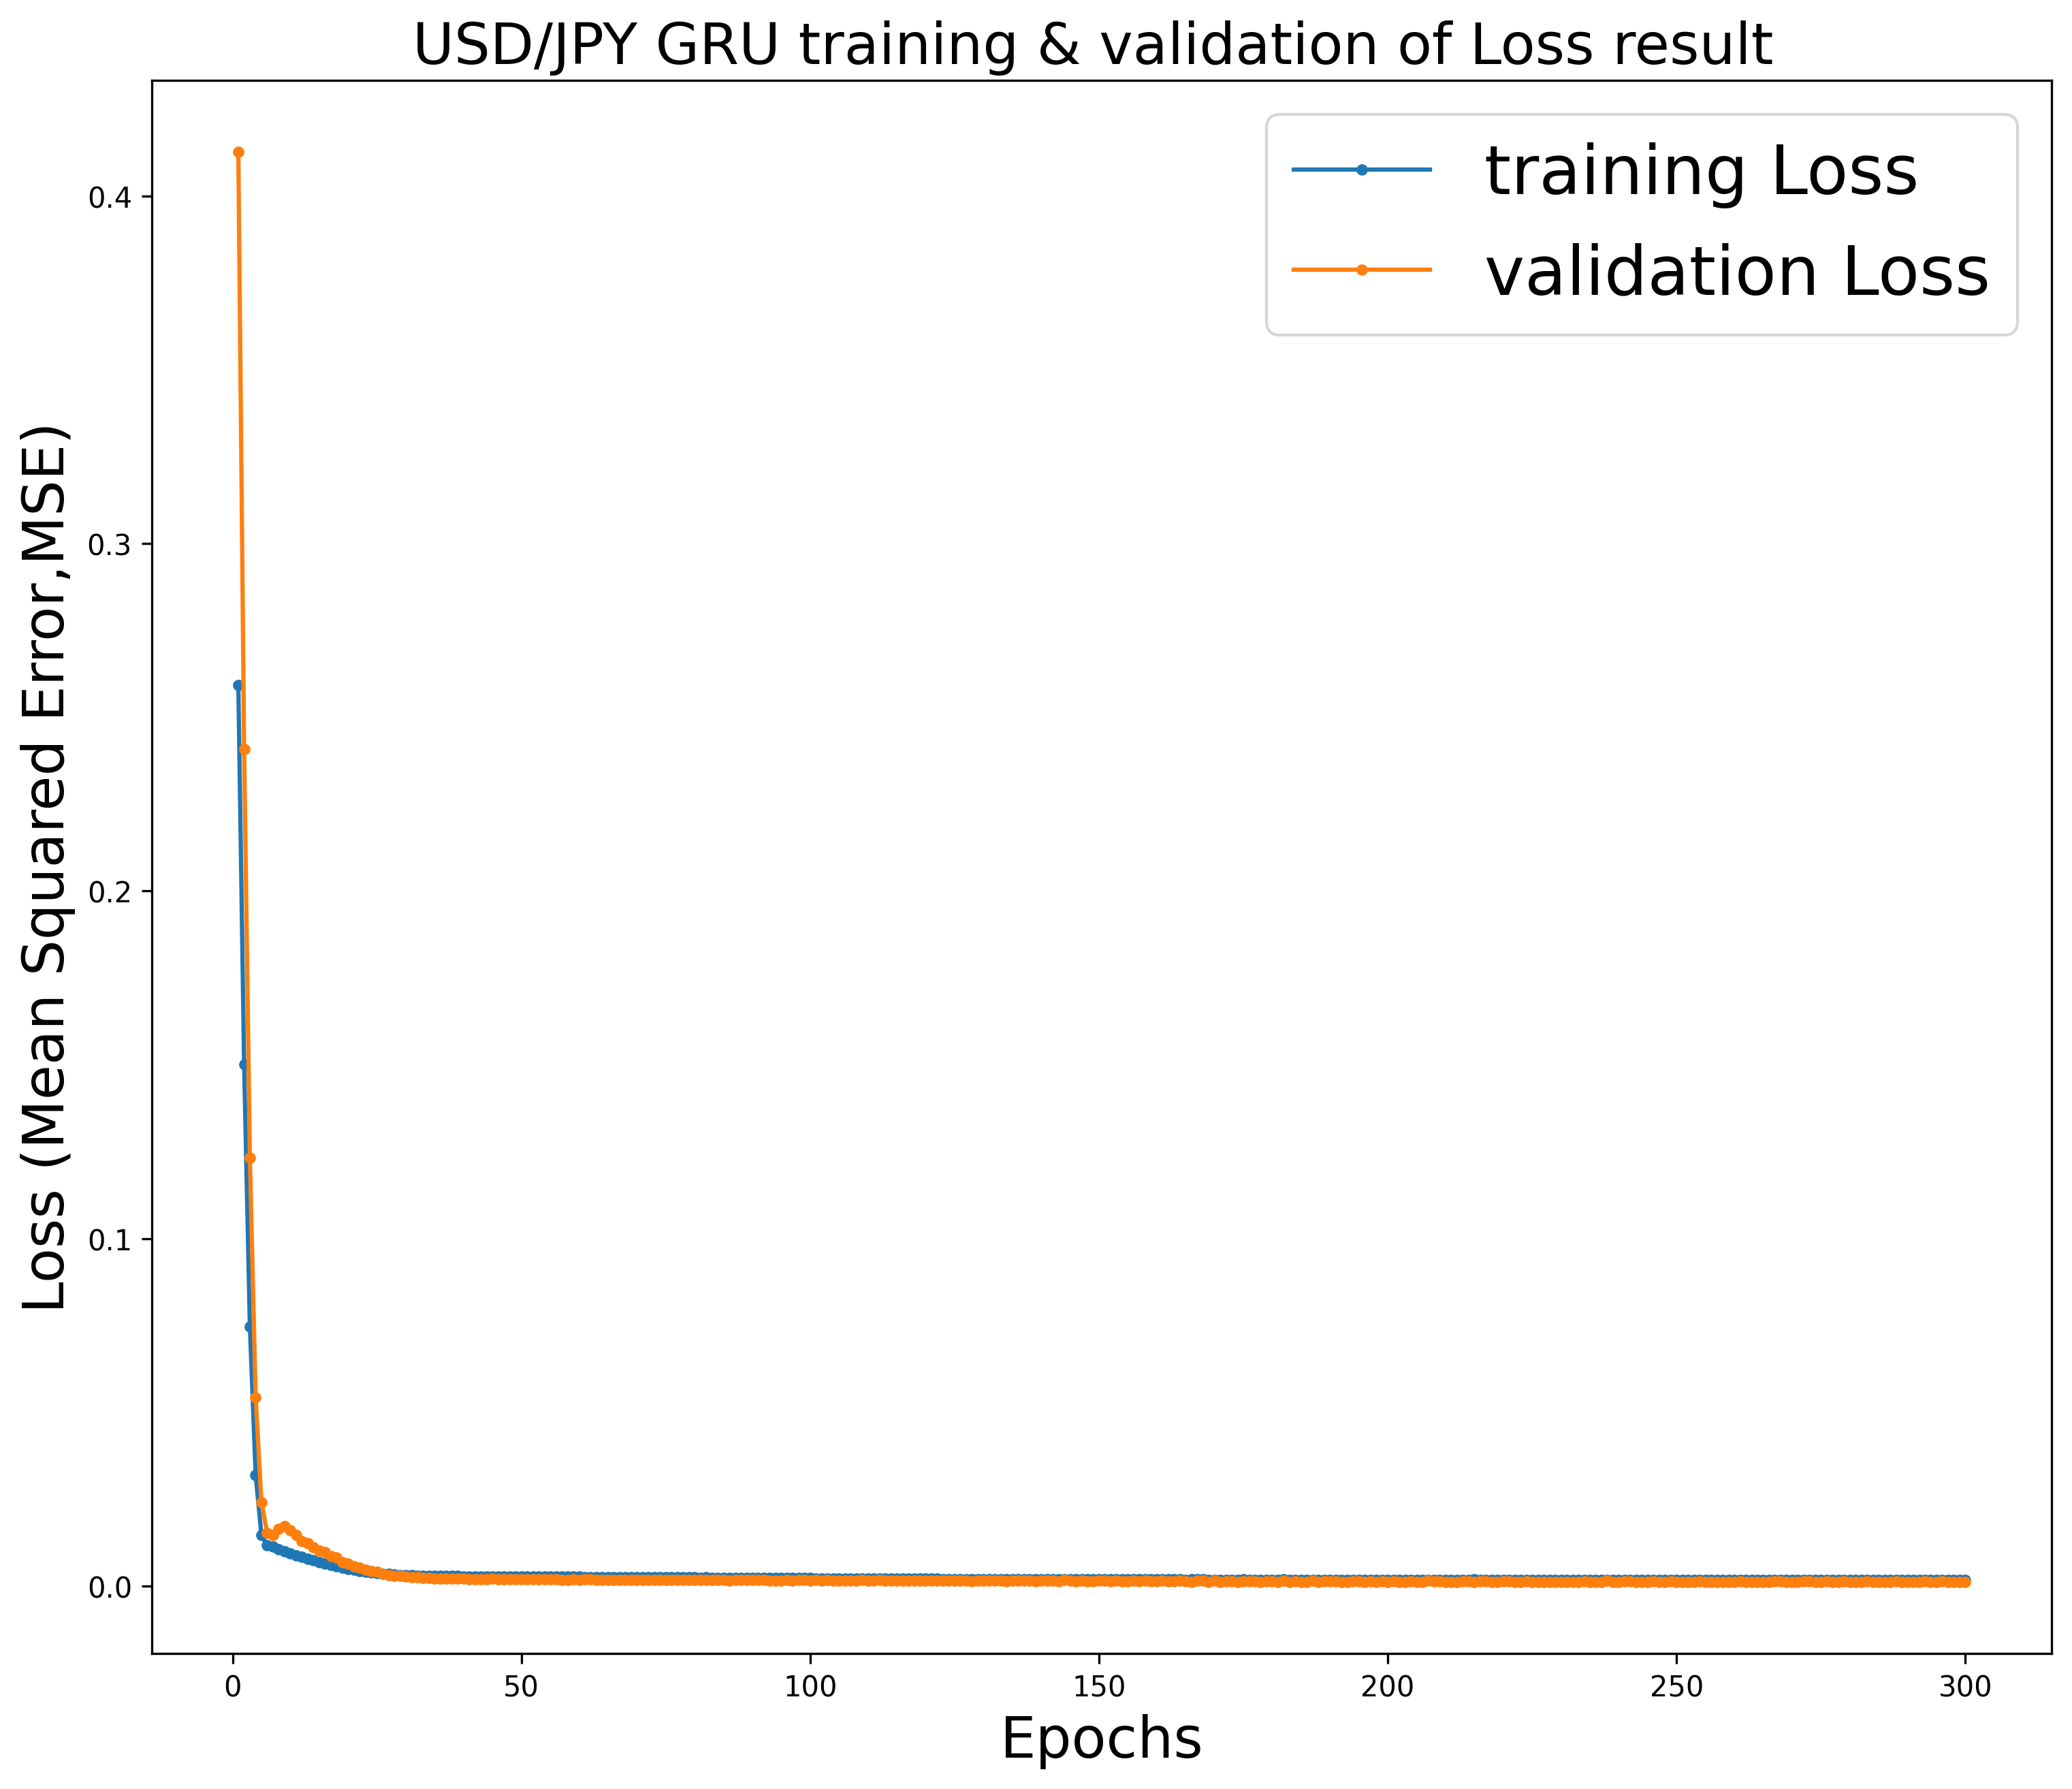

In [ ]:
#Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('USD/JPY GRU training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

# Testing

In [ ]:

predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

10/10 [==============================] - 1s 4ms/step


In [ ]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output.csv', index=False)

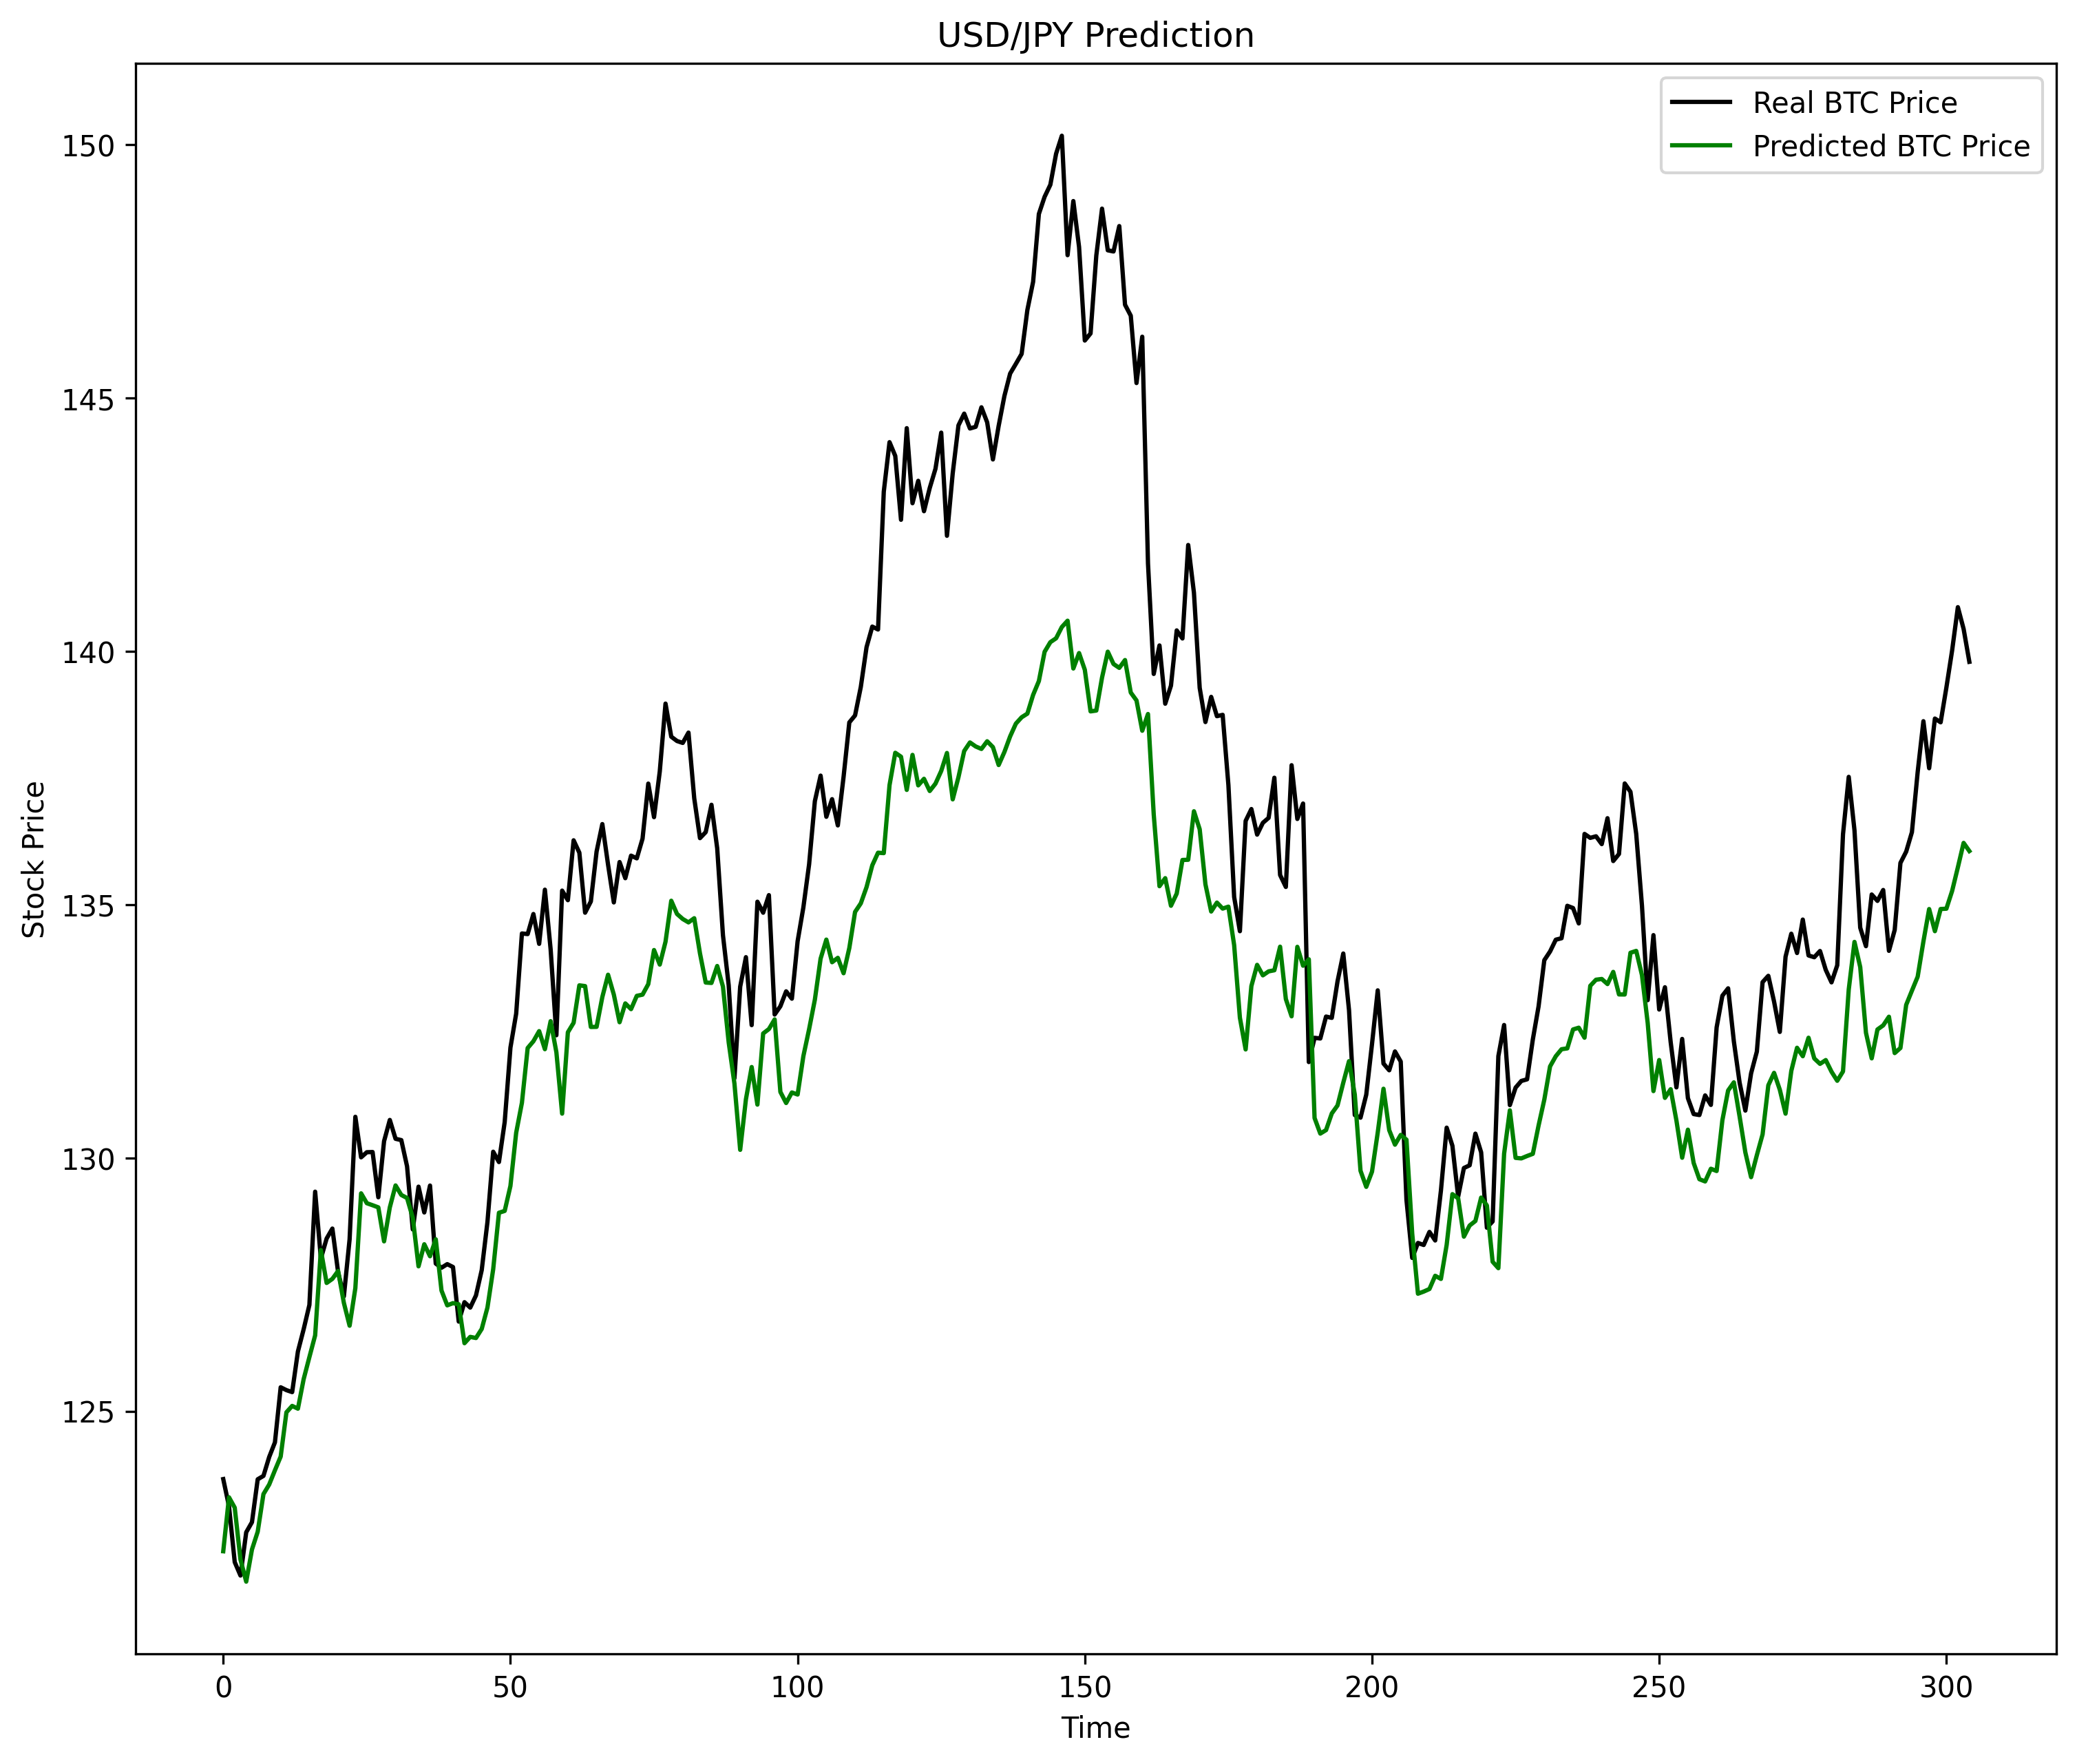

In [ ]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real BTC Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted BTC Price')
plt.title('USD/JPY Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Improve the model

## Build model & Compile & Fit

In [ ]:
keras.backend.clear_session()
model = Sequential()
model.add(LSTM(units = 64,return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 32,activation='relu'))
model.add(Dense(units = 1))
model.summary()
opt=Adam(learning_rate=0.002,beta_1=0.95)
model.compile(optimizer = opt, loss = 'mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


## Plot the history of training and validation

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/100


KeyboardInterrupt: ignored

In [ ]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

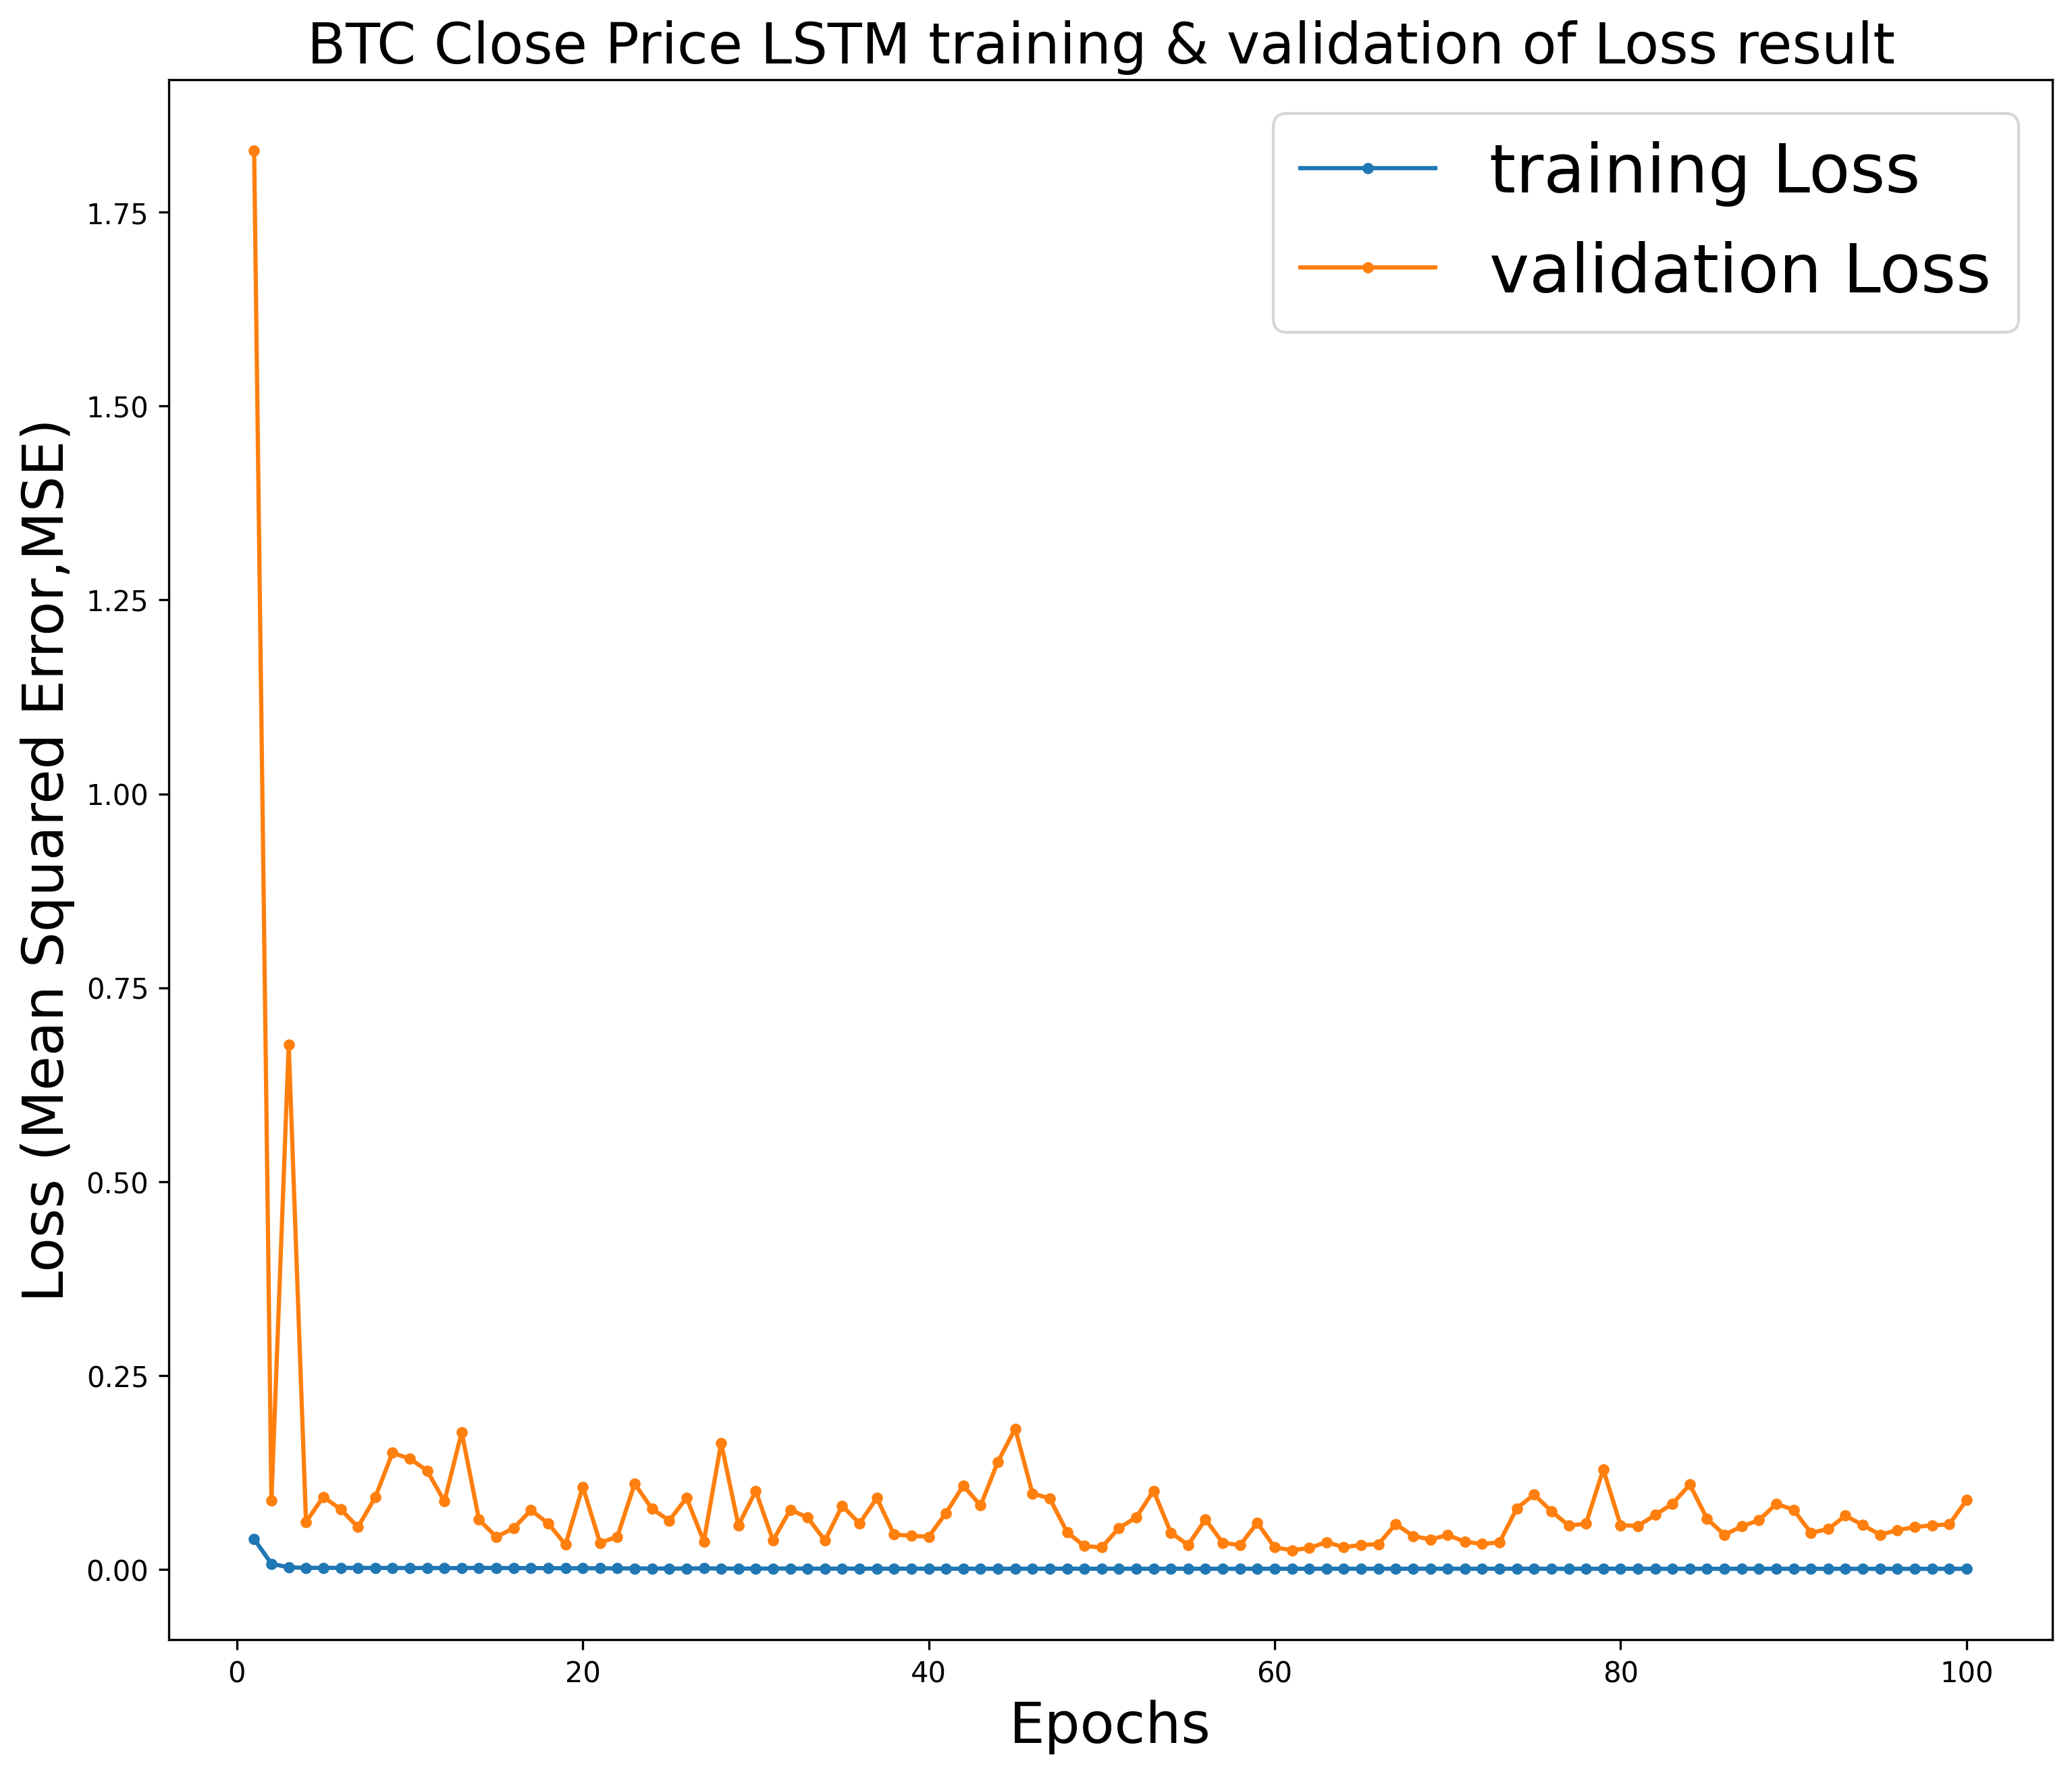

In [ ]:
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('BTC Close Price LSTM training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

11/11 [==============================] - 1s 4ms/step


In [ ]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output2.csv', index=False)

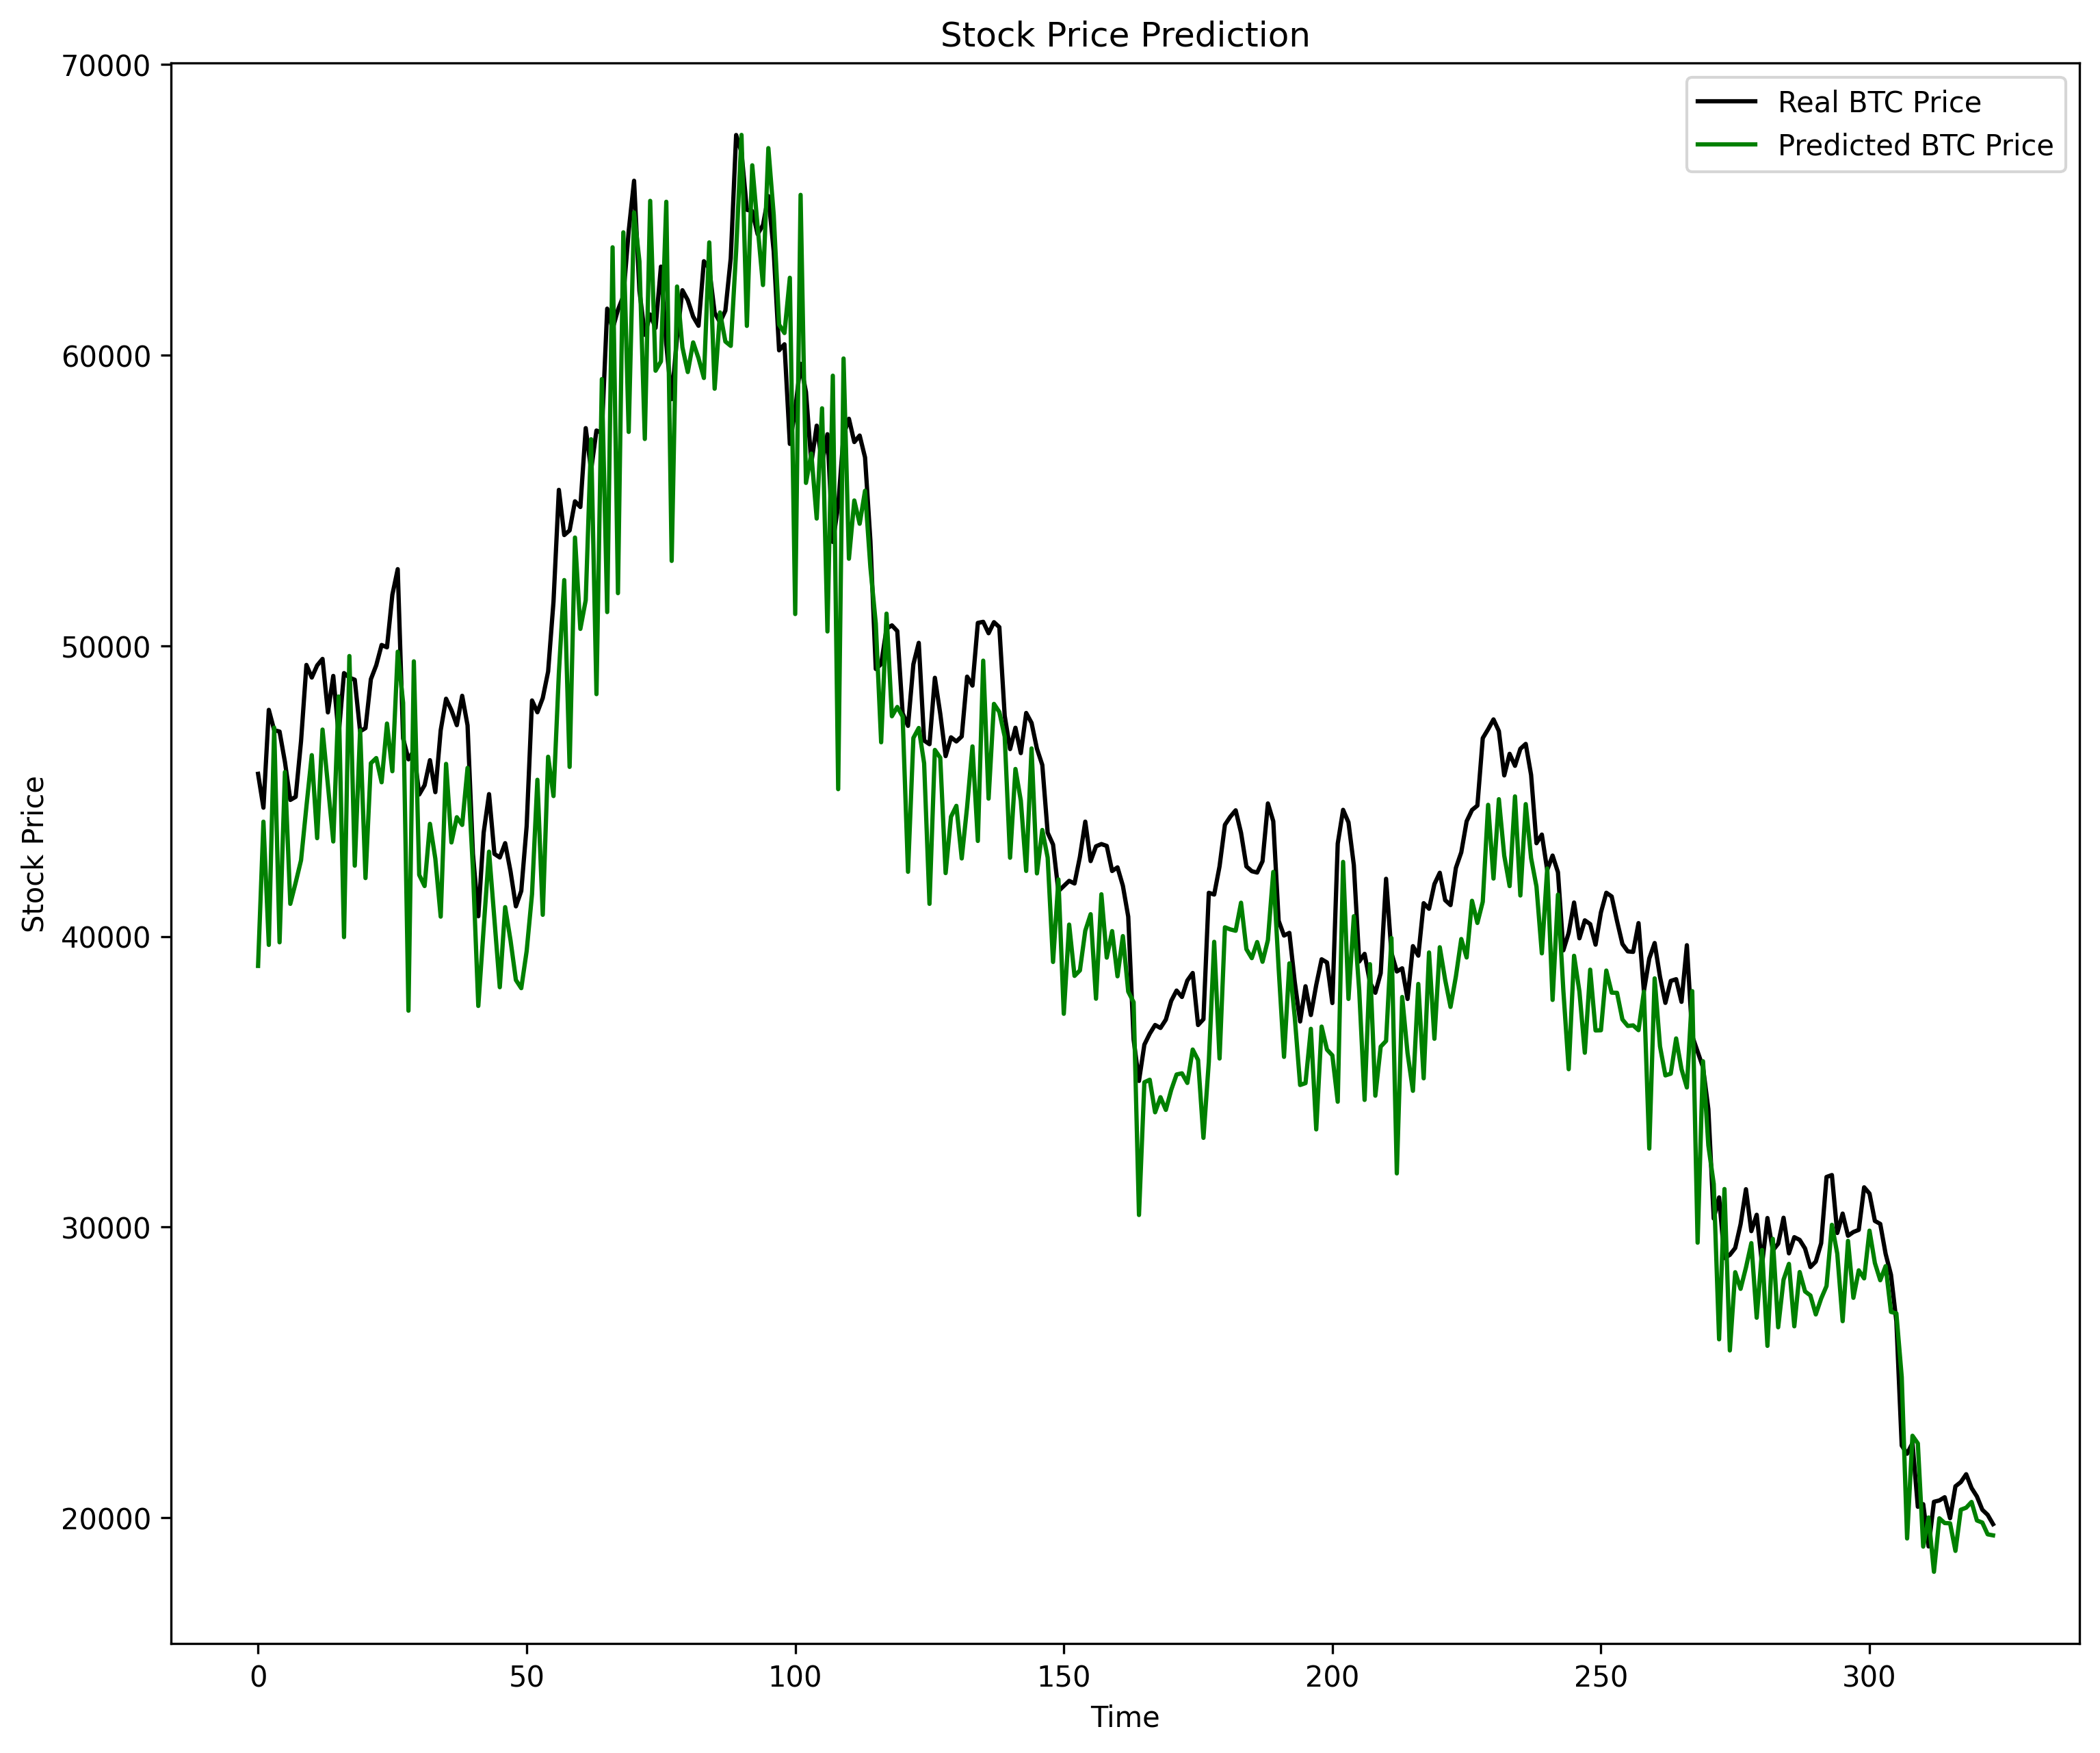

In [ ]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real BTC Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted BTC Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE

# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator

    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [ ]:
predicted_price
actual_price

MAE=mean_absolute_error(actual_price,predicted_price)
MSE=mean_squared_error(actual_price,predicted_price,squared=True)
RMSE=mean_squared_error(actual_price,predicted_price,squared=False)
MAPE=mean_absolute_percentage_error(actual_price,predicted_price)
SMAPE=SMAPE_calulate(actual_price,predicted_price)
RAE=RAE_calculate(actual_price,predicted_price)
MRAE=MRAE_calculate(actual_price,predicted_price)
MdRAE=MdRAE_calculate(actual_price,predicted_price)
RSE=RSE_calculate(actual_price,predicted_price,Root=False)
RRSE=RSE_calculate(actual_price,predicted_price,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 2.969
MSE: 13.605
RMSE: 3.688
MAPE: 2.135 %
SMAPE: 2.17 %
RAE: 0.65
MRAE: 0.0021297218017458075
MdRAE: 0.78 bench: 135.262
RSE: 0.39
RRSE: 0.625


# 多變量使用的方法 把切好的原始資料套用方法

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)